In [ ]:
# Statsmodels - Time series libraries

In [ ]:
# References
[statsmodels - Time Series libraries](https://www.statsmodels.org/stable/tsa.html)
[Decomposition by Oracle](https://blogs.oracle.com/ai-and-datascience/post/decomposition-based-approaches-to-time-series-forecasting)
[Decomposition types](https://towardsdatascience.com/different-types-of-time-series-decomposition-396c09f92693#:~:text=We%20can%20usually%20identify%20an,Otherwise%2C%20the%20series%20is%20additive.)

In [ ]:
#!pip install pykalman

In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
sns.set()

# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option("display.precision", 6)

# optional
#pd.set_option('display.max_columns',100)
sns.set_style('darkgrid')


In [65]:
# Load data

# path = 'e:\PycharmProjects\TimeSeries'
path = os.path.abspath(os.getcwd())

# load apple, google data 
bsz_file = 'balatoni_szallasok.csv'
path_to_bsz_file = os.path.join(path, 'data', bsz_file)
df = pd.read_csv(path_to_bsz_file, parse_dates=["Month"],index_col="Month",).dropna()
df_noindex = pd.read_csv(path_to_bsz_file, parse_dates=["Month"]).dropna()

In [3]:
# Quick check

df.sample(5)
df.head(5)
df.tail(5)

,bNr
Month,
2023-02-01,4
2023-03-01,7
2023-04-01,7
2023-05-01,11
2023-06-01,20


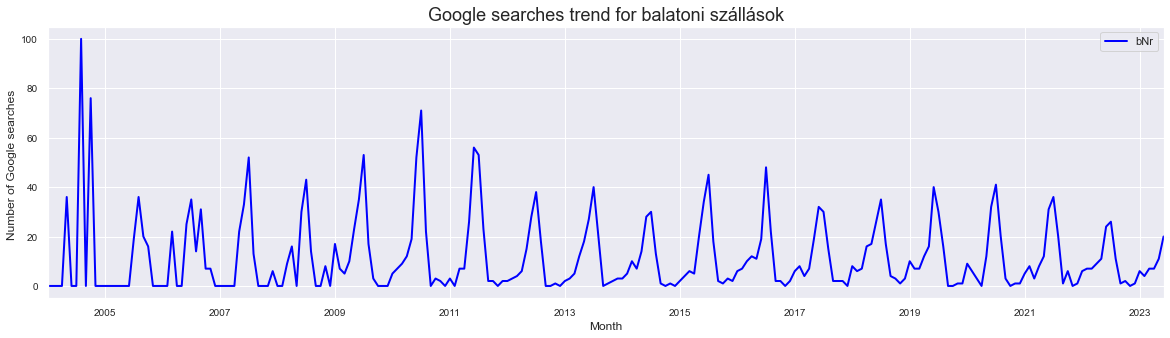

In [4]:
# Basic visualisation

# Plot the time series in your DataFrame
ax = df.plot(color='blue', figsize=(20, 5), linewidth=2, fontsize=10)

# Specify the x-axis label in your plot
ax.set_xlabel('Month')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of Google searches ')

# Specify the title in your plot
ax.set_title('Google searches trend for balatoni szállások', fontsize=18)


# Show plot
plt.show()


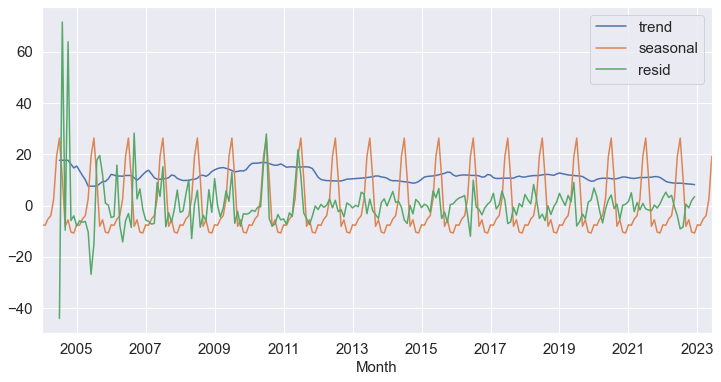

In [6]:
# Decomposition of a time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive') #multiplicative


#print(results.trend)
#print(results.seasonal)
#print(results.resid)
#print(results.observed)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid
observed = decomposition.observed
df_decomposed = pd.concat([trend, seasonal, resid], axis=1)


# Plot the values of the airline_decomposed DataFrame
ax = df_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Month', fontsize=15)
plt.legend(fontsize=15)
plt.show()

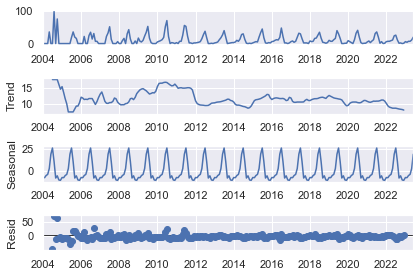

In [7]:
# All in one visualisation
decomposition.plot()
plt.show()

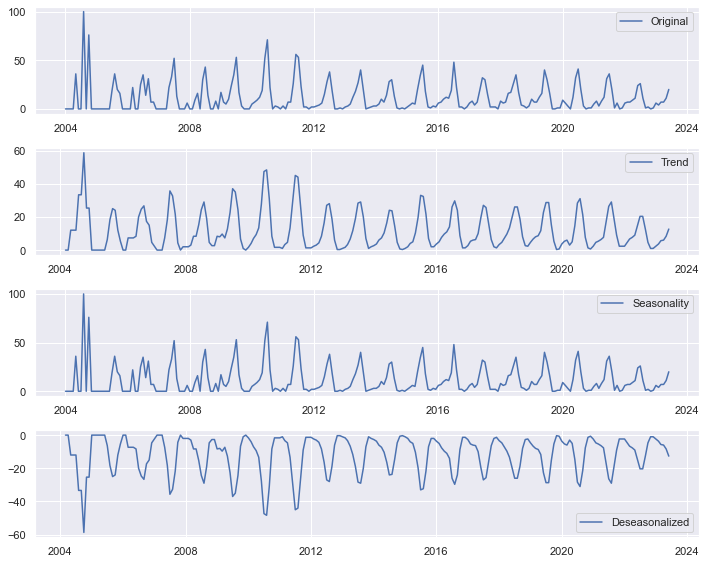

In [15]:
# First experimentation

# To remove trend and seasonality from a time series, you can use the process of deseasonalization and detrending. Here's a common approach using 
#the differencing method:
#Compute the trend component using a rolling average or any other appropriate method. 
#Here, we'll use a simple moving average with a window size of your choice:

window_size = 3  # Adjust the window size as needed
rolling_mean = df.rolling(window=window_size).mean()
detrended_df = df- rolling_mean

#Compute the seasonal component by taking the average values for each season. This step assumes that the seasonality repeats over fixed periods. 
#For example, if you have monthly data and want to remove the monthly seasonality, you can calculate the average values for each month:

seasonal_df = df.groupby(df.index).mean()
deseasonalized_df = detrended_df - seasonal_df

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(rolling_mean, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal_df, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(deseasonalized_df, label='Deseasonalized')
plt.legend()

plt.tight_layout()
plt.show()

#This code will create a 4-subplot figure showing the original data, trend component, seasonal component, and the deseasonalized data.

#By removing the trend and seasonality, you can focus on the residual component, which contains the remaining patterns and irregularities in the time 
#series.


# Detrend time series

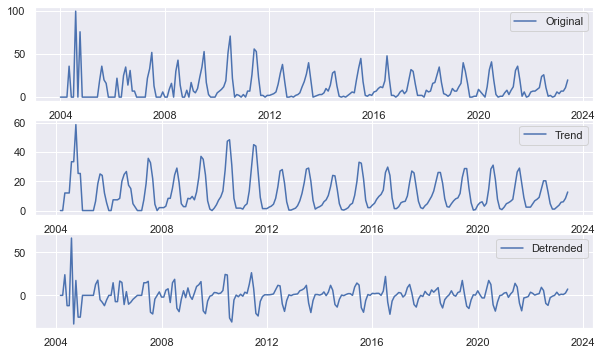

In [17]:
# 1.1 Detrend data using rolling mean - simple moving average

window_size = 3  # Adjust the window size as needed
rolling_mean = df.rolling(window=window_size).mean()
detrended_df = df- rolling_mean

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.title("Detrend data using moving average - rolling mean")
plt.plot(df, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(rolling_mean, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df-rolling_mean, label='Detrended')
plt.legend()

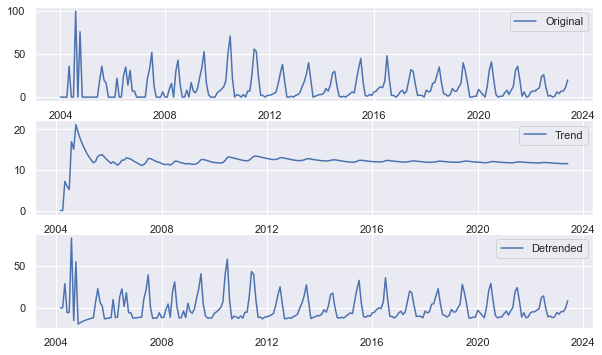

In [18]:
# 1.2 Detrend data using cumulative moving average

cumulative_avg = df.expanding(min_periods=3).mean()

window_size = 3  # Adjust the window size as needed
cumulative_avg = df.expanding(min_periods=window_size).mean()
detrended_df = df- rolling_mean

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.title("Detrend data using cumulative moving average")
plt.plot(df, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(cumulative_avg, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df-cumulative_avg, label='Detrended')
plt.legend()

In [ ]:
# 1.3 Detrend data using exponential moving average

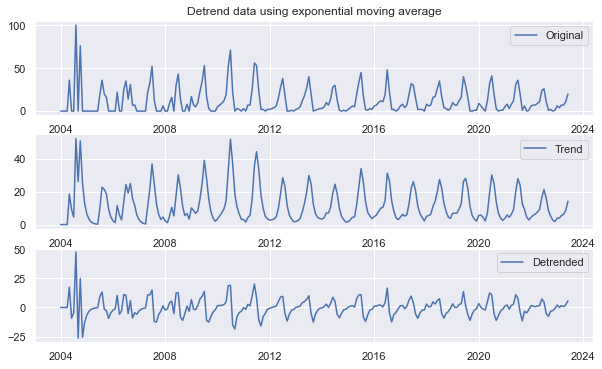

In [37]:
cumulative_avg = df.expanding(min_periods=3).mean()

span = 3  # Adjust the window size as needed 
exponential_moving_avg = df.ewm(span=3,adjust=True).mean()
detrended_df = df- exponential_moving_avg

plt.figure(figsize=(10, 8))
plt.title("Detrend data using exponential moving average")

plt.subplot(4, 1, 1)
plt.title("Detrend data using exponential moving average")
plt.plot(df, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exponential_moving_avg, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df-exponential_moving_avg, label='Detrended')
plt.legend()



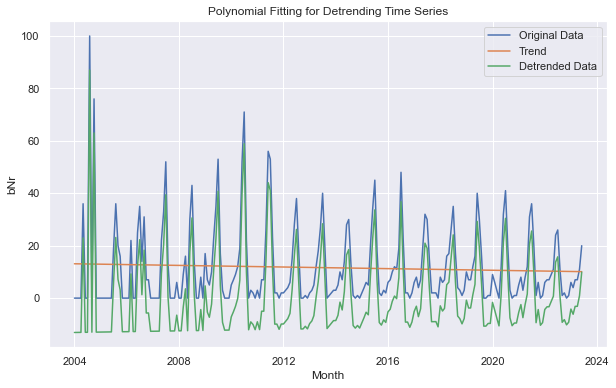

In [75]:
# 2. Detrend data using polinomial fitting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example time series data
#dates = pd.date_range(start='1/1/2021', periods=100, freq='D')
#data = np.sin(np.arange(100) * 2 * np.pi / 30)  # Simulated sinusoidal data
#df_p = pd.DataFrame({'Date': dates, 'Data': data})

# Create a DataFrame with the dates and data

df_p = df_noindex
v_data = 'bNr'
v_date = 'Month'

# Define the degree of the polynomial
degree = 1

# Fit the polynomial curve
coeffs = np.polyfit(df_p.index, df_p[v_data], degree)
trend = np.polyval(coeffs, df_p.index)

# Subtract the trend component from the original data to obtain the detrended data
df_p['Detrended'] = df_p[v_data] - trend

# Plotting the original data, trend, and detrended data
plt.figure(figsize=(10, 6))
plt.plot(df_p[v_date], df_p[v_data], label='Original Data')
plt.plot(df_p[v_date], trend, label='Trend')
plt.plot(df_p[v_date], df_p['Detrended'], label='Detrended Data')
plt.legend()
plt.xlabel(v_date)
plt.ylabel(v_data)
plt.title('Polynomial Fitting for Detrending Time Series')
plt.grid(True)
plt.show()

              bNr
Month            
2004-01-01    NaN
2004-02-01    0.0
2004-03-01    0.0
2004-04-01    0.0
2004-05-01   36.0
2004-06-01  -36.0
2004-07-01    0.0
2004-08-01  100.0
2004-09-01 -100.0
2004-10-01   76.0


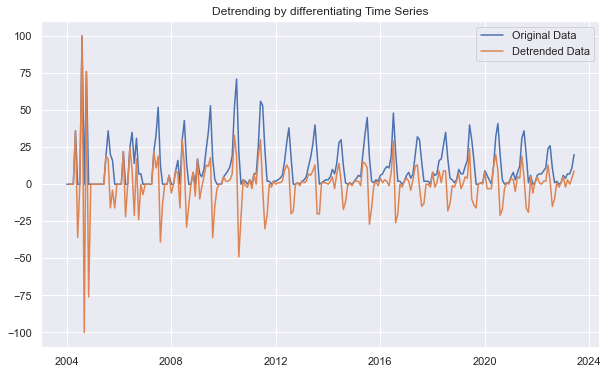

In [78]:
# 3. Detrend time series using differenting 

import pandas as pd

# Example time series data
#dates = pd.date_range(start='1/1/2021', periods=100, freq='D')
#data = [10, 15, 12, 8, 10, 13, 16, 18, 20, 22]  # Sample data
#series = pd.Series(data, index=dates)

# Perform differencing on the series
differenced_df = df.diff()

# Repeat differencing if necessary
# differenced_series = differenced_series.diff()

# Evaluate the detrended series obtained from differencing
#detrended_df = differenced_df.dropna()

print(differenced_df.head(10))

# Plotting the original data, trend, and detrended data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original Data')
plt.plot(differenced_df, label='Detrended Data')
plt.legend()
plt.title('Detrending by differentiating Time Series')
plt.grid(True)
plt.show()

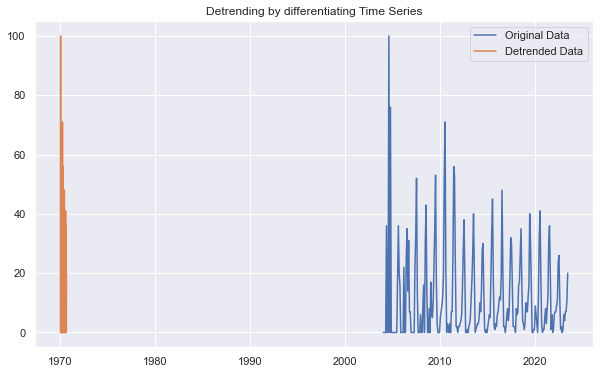

In [83]:
# 4. Detrend time series data using wavelet transformation

import numpy as np
import pywt

# Choose a wavelet
wavelet = 'db4'  # Daubechies 4 wavelet

# Perform wavelet decomposition
coeffs = pywt.wavedec(df, wavelet)

# Determine the desired level of detrending
level = 2  # Number of decomposition levels to retain

# Set the coefficients beyond the desired level to zero
coeffs[level:] = [np.zeros_like(coeff) for coeff in coeffs[level:]]

# Reconstruct the detrended time series
detrended_df = pywt.waverec(coeffs, wavelet)

#print(detrended_df)

# Plotting the original data, trend, and detrended data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original')
plt.plot(detrended_df, label='Detrended')
plt.legend()
plt.title('Detrending Time Series by using wavelets')
plt.grid(True)
plt.show()

# Questions from ChatGPT

In [ ]:
# 5. Methods for detrending data

There are several methods available for detrending data, depending on the characteristics of your data and the specific objective of detrending. Here are a few commonly used methods:

1. Rolling Mean/Subtraction: This method, as mentioned earlier, involves calculating the moving/rolling average of the data and subtracting it from the original series to remove the long-term trend.
2. Polynomial Fitting: Polynomial fitting involves fitting a polynomial function to the data and subtracting it to obtain the detrended data. The degree of the polynomial determines the complexity of the trend that can be captured. Higher degree polynomials can capture more intricate trends but may also overfit the data.
3. Differencing: Differencing is a method commonly used to remove trends in time series data. It involves calculating the difference between consecutive data points. By subtracting the previous value from the current value, you can eliminate the trend component. In some cases, multiple differencing steps may be required to remove higher-order trends.
4. Seasonal Decomposition: If your data exhibits seasonal patterns, seasonal decomposition methods can be effective in detrending. These methods separate the time series into trend, seasonal, and residual components. Once the trend and seasonal components are isolated, they can be subtracted from the original data to obtain the detrended series.
5. Wavelet Transform: The wavelet transform is a mathematical technique that analyzes data at different scales. It can be used to decompose a signal into different frequency components, allowing you to identify and remove specific trends or oscillations.
6. Filtering Techniques: Various digital filtering techniques, such as low-pass or high-pass filters, can be used to remove specific frequencies from the data. These methods are particularly useful when the trend or noise component of interest is well-defined in terms of frequency.

In [ ]:
# 1. Detrend data using rolling mean (CHat GPT question)

#To detrend data using a rolling mean, you can follow these steps:

#Determine the window size for the rolling mean. This represents the number of data points over which the mean will be calculated. A larger window size will result in a smoother detrended data, but it may also remove some important short-term variations. Conversely, a smaller window size will preserve short-term variations but may not capture the overall trend effectively. The choice of window size depends on the characteristics of your data.
#Calculate the rolling mean by sliding the window across your data and computing the mean at each position. You can use various libraries in different programming languages to perform this calculation efficiently. For example, in Python, you can use the Pandas library with the rolling() and mean() functions.
#Subtract the rolling mean from your original data to obtain the detrended data. This step removes the long-term trend captured by the rolling mean.

#Advice from Chat GPT

#In the output, you can see that the first two values are NaN (Not a Number) because the rolling mean cannot be calculated for those positions due to insufficient data points. The subsequent values represent the detrended data.
#Keep in mind that the detrended data obtained using a rolling mean will still contain some short-term variations. If you want to remove those as well, you may consider using more advanced detrending techniques like polynomial fitting or seasonal decomposition.

In [ ]:
# 2. Detrend data using cumulative moving average

Determine the window size for the cumulative moving average. This represents the number of data points over which the average will be calculated. Similar to the rolling mean, a larger window size will result in a smoother detrended data, while a smaller window size will preserve more short-term variations.
Calculate the cumulative sum of your data points. This can be done by adding up the values starting from the first data point and continuing cumulatively.
Calculate the cumulative moving average by dividing the cumulative sum at each position by the corresponding position number. This will give you the average value of the data points up to that position.
Subtract the cumulative moving average from your original data to obtain the detrended data.

In [ ]:
# 3. Difference between rolling mean and cumulative average, exponential moving average

The key difference between a rolling mean and a cumulative average lies in the window over which the mean is calculated.

Rolling Mean: The rolling mean (also known as moving average) is calculated by taking the mean of a specific window of data points and moving that window across the data series. At each position, the mean is calculated within the defined window, and the window then shifts to the next position. This process creates a smoothed average that adapts to the local characteristics of the data. The window size determines the number of data points considered in each calculation.
Cumulative Average: The cumulative average (or cumulative moving average) is the average of a set of data points up to a given position. It is calculated by cumulatively summing the data points from the beginning of the series and dividing by the number of data points included at each position. The cumulative average provides the average value for all the data points up to a specific position, incorporating the entire history of the data.

In summary, the main distinction between the rolling mean and cumulative average is that the rolling mean considers a fixed-size window that moves along the data series, whereas the cumulative average considers all the data points leading up to a given position.
The choice between using a rolling mean or cumulative average depends on the specific context and purpose. The rolling mean is useful for smoothing out short-term fluctuations and identifying the overall trend in the data, while the cumulative average reflects the average value up to each point, providing insight into the progression of the data over time.

In [ ]:
# 4. How to determine smoothing factor for ewm - exponential moving average

The choice of the smoothing factor (also known as the alpha value) for the exponential moving average (EMA) depends on your specific requirements and the characteristics of your data. The smoothing factor determines the weight given to the current data point and the previous EMA value. A smaller alpha value gives more weight to past data points, resulting in a smoother EMA and a slower response to recent changes. Conversely, a larger alpha value gives more weight to the current data point, resulting in a more responsive EMA that closely tracks recent changes.

Here are a few approaches you can consider to determine the smoothing factor for EMA:
Trial and Error: Start by trying different alpha values and observe the results. Plot the EMA with different alpha values and compare them to the original data. Adjust the alpha value until you achieve the desired level of smoothing or responsiveness.
Subject Matter Expertise: If you have domain knowledge or prior experience with the data, you can make an informed decision about the alpha value based on the expected characteristics of the underlying trend and noise. For example, if you anticipate that the data has a slow-changing trend, you may choose a smaller alpha value for smoother results.
Data Exploration: Analyze the characteristics of your data to gain insights. Look for patterns, seasonality, or the frequency of changes. If your data exhibits high volatility or frequent fluctuations, a smaller alpha value may be suitable to smooth out the noise. On the other hand, if your data has low variability or infrequent changes, a larger alpha value can capture changes more quickly.
Use Standard Values: There are some standard values commonly used for alpha in EMA calculations. For example, alpha = 0.2 is often used for a 5-day EMA, alpha = 0.1 for a 10-day EMA, and alpha = 0.05 for a 20-day EMA. These values provide a reasonable starting point and can be adjusted as needed based on your specific requirements.

In [51]:
# Example

import pandas as pd

# Example data
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Convert data to a pandas Series
series = pd.Series(data)
window_size = 3
alpha = 0.02 #(0,1)

# Calculate the cumulative moving average
rolling_mean = series.rolling(window=window_size).mean()
cumulative_avg = series.expanding().mean() #min_periods=window_size
cumulative_avg_per = series.expanding(min_periods=window_size).mean() #min_periods=window_size
exponential_moving_avg_span = series.ewm(span=3, adjust=True).mean() #using span
exponential_moving_avg_alpha = series.ewm(alpha= alpha, adjust=True).mean() #using alpha

df_ex = pd.DataFrame({'Original': series, 
                      'Rolling mean': rolling_mean, 
                      'Cummulative avg': cumulative_avg, 
                      'Cummulative avg period': cumulative_avg_per,
                      'Exponential moving avg span': exponential_moving_avg_span,
                      'Exponential moving avg alpha': exponential_moving_avg_alpha,
                     })
df_ex

,Original,Rolling mean,Cummulative avg,Cummulative avg period,Exponential moving avg span,Exponential moving avg alpha
0,1,NaN,1.0,NaN,1.0,1.0
1,2,NaN,1.5,NaN,1.7,1.5
2,3,2.0,2.0,2.0,2.4,2.0
3,4,3.0,2.5,2.5,3.3,2.5
4,5,4.0,3.0,3.0,4.2,3.0
5,6,5.0,3.5,3.5,5.1,3.6
6,7,6.0,4.0,4.0,6.1,4.1
7,8,7.0,4.5,4.5,7.0,4.6
8,9,8.0,5.0,5.0,8.0,5.1
9,10,9.0,5.5,5.5,9.0,5.7


In [ ]:
# 5. Detrend using polinomial fitting 

In [76]:
# 6. Detrend time series using differenting

To detrend a time series data using differencing, you can follow these steps:

Calculate the differences between consecutive data points in the time series. This can be done by subtracting the value at time t from the value at time t-1. The resulting differences represent the changes between adjacent data points.
Repeat the differencing process if necessary. Depending on the specific trend in the data, you may need to perform differencing multiple times to remove higher-order trends. Each additional differencing step calculates the differences between consecutive differences from the previous step.
Evaluate the detrended series obtained from the differencing process.

Remember that differencing is effective in removing linear trends. However, if your data exhibits more complex or nonlinear trends, you may need to consider other detrending techniques.

In [ ]:
# 7. Detrend time series data using wavelet transformation

Choose a suitable wavelet. Wavelets are small functions used to analyze the data at different scales. Different wavelets have different characteristics, and the choice depends on the properties of your time series data. Commonly used wavelets include Haar, Daubechies, and Morlet.
Apply the wavelet transformation to your time series data. This involves decomposing the data into different frequency components at multiple scales using wavelet analysis techniques, such as the discrete wavelet transform (DWT) or the continuous wavelet transform (CWT). The result is a set of wavelet coefficients that represent the data in the frequency-time domain.
Determine the desired level of detrending. Depending on the characteristics of your data and the trend you want to remove, you can choose to retain a subset of the wavelet coefficients while discarding others. This selection process can be based on specific frequency bands or coefficients associated with certain scales.
Reconstruct the detrended time series by performing the inverse wavelet transform on the selected wavelet coefficients. This will produce the detrended data, which represents the original time series with the trend removed.

In [84]:
# Example 1

import numpy as np
import pywt

# Example time series data
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Choose a wavelet
wavelet = 'db4'  # Daubechies 4 wavelet

# Perform wavelet decomposition
coeffs = pywt.wavedec(data, wavelet)

# Determine the desired level of detrending
level = 2  # Number of decomposition levels to retain

# Set the coefficients beyond the desired level to zero
coeffs[level:] = [np.zeros_like(coeff) for coeff in coeffs[level:]]

# Reconstruct the detrended time series
detrended_data = pywt.waverec(coeffs, wavelet)

print(detrended_data)

[ 1  2  3  4  5  6  7  8  9 10]


In [85]:
# Example 2.
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example time series data
dates = pd.date_range(start='1/1/2021', periods=100, freq='D')
data = np.sin(np.arange(100) * 2 * np.pi / 30)  # Simulated sinusoidal data

# Create a pandas DataFrame with the dates and data
df = pd.DataFrame({'Date': dates, 'Data': data})

# Extract the time series data
series = df['Data'].values

# Perform wavelet transformation
wavelet = 'db4'  # Choose the wavelet type
level = 4       # Choose the level of decomposition
coeffs = pywt.wavedec(series, wavelet, level=level)

# Reconstruct the trend component using only the low-frequency components
trend = pywt.waverec(coeffs[:level], wavelet)

# Subtract the trend component from the original data to obtain the detrended data
detrended_data = series - trend

# Plotting the original data, trend, and detrended data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], series, label='Original Data')
plt.plot(df['Date'], trend, label='Trend')
plt.plot(df['Date'], detrended_data, label='Detrended Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Data')
plt.title('Wavelet Transformation for Detrending Time Series')
plt.grid(True)
plt.show()

ValueError: operands could not be broadcast together with shapes (100,) (54,) 

In [ ]:
# 8. Filtering techniques
Filtering techniques are commonly used to remove specific frequencies or components from data. They can be effective in detrending data by isolating or removing unwanted fluctuations, noise, or specific frequency bands. Here are a few common filtering techniques:

Low-pass Filter: A low-pass filter allows low-frequency components to pass through while attenuating higher-frequency components. It effectively removes high-frequency noise or variations, allowing the underlying trend or slow changes to be more visible. Low-pass filters are particularly useful when you want to focus on the long-term behavior of the data.
High-pass Filter: A high-pass filter allows high-frequency components to pass through while attenuating lower-frequency components. It removes low-frequency variations, such as slow trends or baseline shifts, while preserving fast changes or high-frequency noise. High-pass filters can be useful when you want to focus on short-term fluctuations or remove the long-term trend from the data.
Band-pass Filter: A band-pass filter allows a specific range of frequencies to pass through while attenuating frequencies outside that range. It filters out both high and low frequencies, focusing on a specific band of interest. Band-pass filters are useful when you want to isolate specific periodic components or frequency bands in the data.
Moving Average Filter: A moving average filter calculates the average of a window of data points and replaces the central data point with the average value. It effectively smooths the data by averaging out short-term fluctuations. The window size determines the extent of smoothing, with larger window sizes resulting in more smoothing.
Savitzky-Golay Filter: The Savitzky-Golay filter performs a local polynomial regression on the data to smooth it. It calculates a weighted least-squares fit within a sliding window, allowing for flexible smoothing while preserving important features. The degree of the polynomial and the window size are adjustable parameters in this filter.

These filtering techniques can be implemented using various signal processing libraries such as SciPy, MATLAB, or specialized packages like the Python library "scipy.signal." The choice of the appropriate filter and its parameters depends on the characteristics of your data, the specific frequencies or components you want to remove, and the desired trade-off between smoothing and preserving important features.

In [ ]:
# When to apply Kalman Filter for detrending data
The Kalman filter is a recursive mathematical algorithm used for estimation and filtering of dynamic systems. While the Kalman filter can be applied in a wide range of applications, including state estimation, tracking, and control, it may not be the most suitable option for detrending data in all cases. Here are some considerations for determining when to apply the Kalman filter for detrending data:

Dynamic Systems: The Kalman filter is designed to handle dynamic systems with temporal dependencies. If your data exhibits a dynamic behavior, such as time-varying trends, changing slopes, or non-linear patterns, the Kalman filter can potentially be useful for detrending.
Noisy Measurements: The Kalman filter is effective in handling noisy measurements and can provide improved estimates by combining the measurements with a dynamic model. If your data contains measurement noise or other sources of variability, the Kalman filter can help in separating the underlying trend from the noise.
State Estimation: The Kalman filter estimates the state of a dynamic system based on available measurements. If you have additional information or measurements related to the underlying state of the system that can be incorporated into the detrending process, the Kalman filter can be beneficial.
Recursive Filtering: The Kalman filter operates in a recursive manner, continually updating the estimated state based on new measurements. If you have streaming or real-time data, and you need to continuously detrend the data as new measurements arrive, the Kalman filter provides an efficient and recursive filtering approach.
Known System Dynamics: The Kalman filter requires a mathematical model or understanding of the system dynamics. If you have a priori knowledge about the underlying behavior of the data and can formulate a dynamic model, the Kalman filter can be applied to estimate the trend and separate it from the noise.

It's worth noting that the Kalman filter assumes linearity and Gaussian noise properties. If your data violates these assumptions or has complex 
nonlinear trends, other techniques such as wavelet transforms, polynomial fitting, or filtering methods may be more suitable for detrending.

It is advisable to assess the suitability of the Kalman filter based on your specific requirements and perform comparative evaluations with alternative detrending methods.

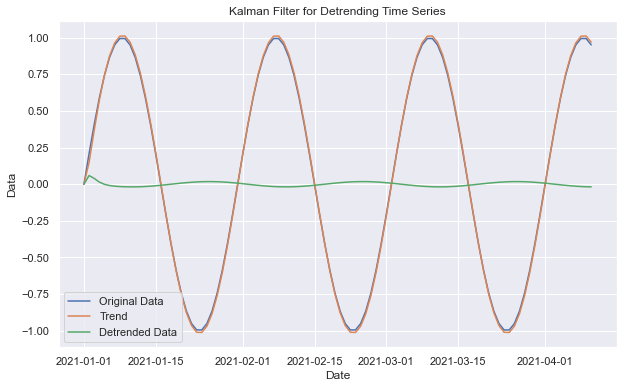

In [88]:
# Example Kalman Filter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Example time series data
dates = pd.date_range(start='1/1/2021', periods=100, freq='D')
data = np.sin(np.arange(100) * 2 * np.pi / 30)  # Simulated sinusoidal data

# Create a pandas DataFrame with the dates and data
df = pd.DataFrame({'Date': dates, 'Data': data})

# Extract the time series data
series = df['Data'].values

# Define the state transition matrix
transition_matrix = [[1, 1], [0, 1]]

# Define the observation matrix
observation_matrix = [[1, 0]]

# Create the Kalman filter
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix
)

# Perform Kalman filtering
filtered_state_means, filtered_state_covariances = kf.filter(series)

# Extract the trend component
trend = filtered_state_means[:, 0]

# Subtract the trend component from the original data to obtain the detrended data
detrended_data = series - trend

# Plotting the original data, trend, and detrended data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], series, label='Original Data')
plt.plot(df['Date'], trend, label='Trend')
plt.plot(df['Date'], detrended_data, label='Detrended Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Data')
plt.title('Kalman Filter for Detrending Time Series')
plt.grid(True)
plt.show()